In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img5 = cv2.imread('Lab1_Images/imageQ5.png',0)

In [3]:
def histogram_equalization(img):
    o_img = np.copy(img)
    img_c = np.copy(img)
    m,n = img.shape
    t_pixel = m * n
    r=[]
    s=[]
    for i in range(256):
        r.append(np.sum(img_c==i)/t_pixel)
    t = 0
    for i in range(256):
        t = t + r[i]
        s.append(t)
    for i in range(256):
        o_img[np.where(img == i)] = 255 * s[i]
    return o_img

In [4]:
low_pass = cv2.medianBlur(img5,3)

In [5]:
high_pass = img5 - low_pass

In [6]:
result = img5 + high_pass

In [7]:
result = cv2.medianBlur(result,3)

In [8]:
a = 0
b = 255
c = 255
d = 0
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i][j] < c:
            c = result[i][j]
        if result[i][j] > d:
            d = result[i][j]
print(a,b,c,d)

0 255 4 53


In [9]:
result = np.subtract(result,c)

In [10]:
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        result[i][j] = result[i][j]*((b-a)/(d-c))

In [11]:
result = histogram_equalization(result)

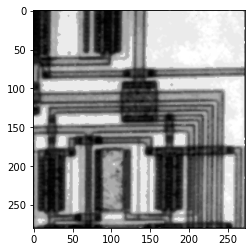

In [12]:
plt.imshow(result,cmap='gray')
plt.show()

In [14]:
cv2.imwrite('restore.png',result)

True